In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('qqq.csv')

Saving qqq.csv to qqq.csv


In [2]:
import pandas as pd
import numpy as np

def initial_data_inspection(dataframe):
    # Display basic information about the dataset
    info = dataframe.info()
    # Display the first few rows
    head = dataframe.head()
    # Summary statistics for numerical columns
    summary = dataframe.describe()
    return info, head, summary

print (df.info())
print (df.head())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player Name           2598 non-null   object 
 1   Match Date            2568 non-null   object 
 2   Passes Attempted      2608 non-null   int64  
 3   Passes Completed      2608 non-null   int64  
 4   Passing Accuracy (%)  2598 non-null   float64
 5   Goals                 2598 non-null   float64
 6   Assists               2608 non-null   int64  
 7   Yellow Cards          2568 non-null   float64
 8   Red Cards             2608 non-null   int64  
 9   Minutes Played        2608 non-null   int64  
 10  Position              2598 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 224.2+ KB
None
     Player Name  Match Date  Passes Attempted  Passes Completed  \
0  Shane O'Neill  2023-01-01                98                50   
1  Shane O'Neill  2023-01

In [3]:
def data_verification(dataframe):
    # Check for duplicates
    duplicates = dataframe.duplicated().sum()
    # Verify consistency in data types
    data_types = dataframe.dtypes
    # Check for missing values
    missing_values = dataframe.isnull().sum()
    return duplicates, data_types, missing_values

# Call the function and print the results with tabs in between
duplicates, data_types, missing_values = data_verification(df)

print(f"duplicates:\t{duplicates}")
print(f"\ndatatypes:\n{data_types}")
print(f"\nnull values:\n{missing_values}")

duplicates:	2388

datatypes:
Player Name              object
Match Date               object
Passes Attempted          int64
Passes Completed          int64
Passing Accuracy (%)    float64
Goals                   float64
Assists                   int64
Yellow Cards            float64
Red Cards                 int64
Minutes Played            int64
Position                 object
dtype: object

null values:
Player Name             10
Match Date              40
Passes Attempted         0
Passes Completed         0
Passing Accuracy (%)    10
Goals                   10
Assists                  0
Yellow Cards            40
Red Cards                0
Minutes Played           0
Position                10
dtype: int64


In [4]:
def standardize_data_formats(dataframe):
    # Convert 'Match Date' to a consistent format (MM/DD/YYYY)
    dataframe['Match Date'] = pd.to_datetime(dataframe['Match Date']).dt.strftime('%m/%d/%Y')
    return dataframe

In [5]:
def handle_missing_data(dataframe):
    # Fill missing values for numerical columns with the median
    numerical_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    dataframe[numerical_cols] = dataframe[numerical_cols].fillna(dataframe[numerical_cols].median())
    # Drop rows with missing 'Player Name' and 'Match Date'
    dataframe = dataframe.dropna(subset=['Player Name', 'Match Date'])
    # Drop duplicate rows
    dataframe = dataframe.drop_duplicates()
    # Fill any remaining missing values in non-numerical columns if needed
    dataframe = dataframe.fillna("Unknown")  # Use "Unknown" for remaining missing text data
    return dataframe

# Apply the function to handle missing data
df = handle_missing_data(df)

# Print the sum of duplicates and null values after handling missing data
print(f"Sum of duplicates:\t{df.duplicated().sum()}")
print(f"Sum of null values:\t{df.isnull().sum().sum()}")

Sum of duplicates:	0
Sum of null values:	0


In [6]:
def detect_and_treat_outliers(dataframe, threshold=1.5):
    # Using the IQR method for outlier detection
    for column in ['Passes Attempted', 'Passes Completed', 'Passing Accuracy (%)', 'Goals', 'Assists', 'Minutes Played']:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        # Identify outliers
        outliers = dataframe[(dataframe[column] < Q1 - threshold * IQR) | (dataframe[column] > Q3 + threshold * IQR)]
        dataframe = dataframe[~dataframe.index.isin(outliers.index)]
    return dataframe

In [7]:
def normalize_data(dataframe):
    # Normalize 'Passing Accuracy (%)' between 0 and 1
    dataframe['Passing Accuracy (Normalized)'] = (dataframe['Passing Accuracy (%)'] - dataframe['Passing Accuracy (%)'].min()) / (dataframe['Passing Accuracy (%)'].max() - dataframe['Passing Accuracy (%)'].min())
    return dataframe

In [8]:
player_positions = df[['Player Name', 'Position']].drop_duplicates(subset='Player Name')

# Reset the index to avoid displaying the index numbers
player_positions = player_positions.reset_index(drop=True)

print("List of Players and Their Positions:")
print(player_positions.to_string(index=False))

List of Players and Their Positions:
           Player Name   Position
         Shane O'Neill   Defender
     Mark-Anthony Kaye Midfielder
         Sigurd Rosted   Defender
          Sean Johnson Goalkeeper
        Victor Vazquez Midfielder
           Ayo Akinola    Forward
          Deandre Kerr    Forward
        Raoul Petretta   Defender
Alonso Coello Camarero Midfielder
       Michael Bradley Midfielder
       Lorenzo Insigne    Forward
         Kobe Franklin   Defender
          Tomas Romero Goalkeeper
         Richie Laryea   Defender
      Brandon Servania Midfielder
           C.J. Sapong    Forward
       Jonathan Osorio Midfielder
        Adama Diomande    Forward
 Federico Bernardeschi    Forward
         Kosi Thompson   Defender


In [9]:
forwards = df[df['Position'] == 'Forward'][['Player Name']].drop_duplicates().reset_index(drop=True)
midfielders = df[df['Position'] == 'Midfielder'][['Player Name']].drop_duplicates().reset_index(drop=True)
defenders = df[df['Position'] == 'Defender'][['Player Name']].drop_duplicates().reset_index(drop=True)
goalkeepers = df[df['Position'] == 'Goalkeeper'][['Player Name']].drop_duplicates().reset_index(drop=True)

# Display the lists for each position without index numbers
print("Forwards:")
print(forwards.to_string(index=False))
print("\nMidfielders:")
print(midfielders.to_string(index=False))
print("\nDefenders:")
print(defenders.to_string(index=False))
print("\nGoalkeepers:")
print(goalkeepers.to_string(index=False))

Forwards:
          Player Name
          Ayo Akinola
         Deandre Kerr
      Lorenzo Insigne
          C.J. Sapong
       Adama Diomande
Federico Bernardeschi

Midfielders:
           Player Name
     Mark-Anthony Kaye
        Victor Vazquez
Alonso Coello Camarero
       Michael Bradley
      Brandon Servania
       Jonathan Osorio

Defenders:
   Player Name
 Shane O'Neill
 Sigurd Rosted
Raoul Petretta
 Kobe Franklin
 Richie Laryea
 Kosi Thompson

Goalkeepers:
 Player Name
Sean Johnson
Tomas Romero


Top 10 Players by Average Passing Accuracy:
Player Name
Michael Bradley           86.667273
Brandon Servania          86.101667
Richie Laryea             85.998000
Deandre Kerr              85.903333
Federico Bernardeschi     85.817500
Jonathan Osorio           85.472857
Alonso Coello Camarero    84.712727
Kosi Thompson             83.820000
Sean Johnson              83.786667
Adama Diomande            82.956250
Name: Passing Accuracy (%), dtype: float64


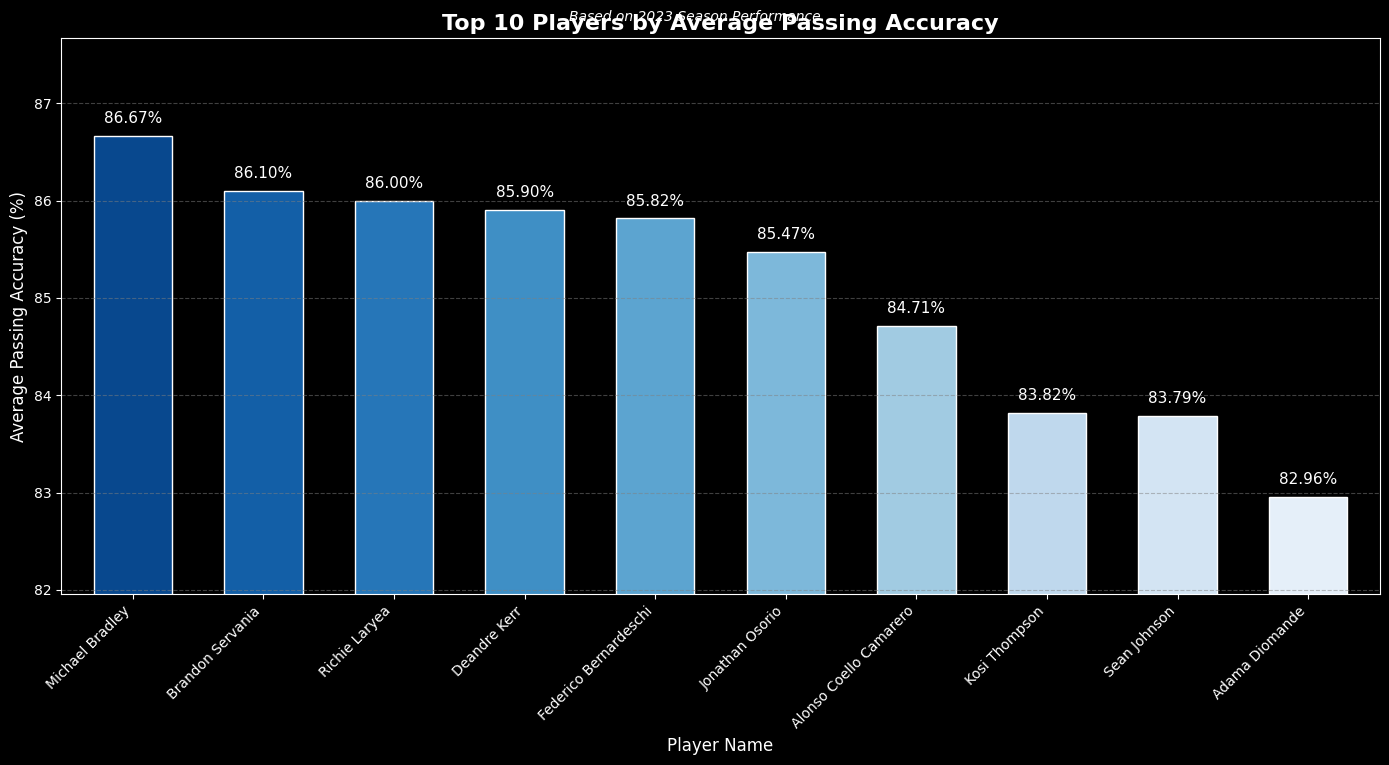

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
top_players = df.groupby('Player Name')['Passing Accuracy (%)'].mean().sort_values(ascending=False).head(10)

print("Top 10 Players by Average Passing Accuracy:")
print(top_players)

# Set a color palette using seaborn for better visuals
palette = sns.color_palette("Blues_r", len(top_players))  # Use a reversed palette for a gradient effect

# Create the plot
plt.figure(figsize=(14, 8))
bars = top_players.plot(
    kind='bar',
    color=palette,
    edgecolor='white',
    linewidth=1,
    width=0.6  # Adjust width for better bar spacing
)

# Add labels and title with adjusted colors for the dark background
plt.title('Top 10 Players by Average Passing Accuracy', fontsize=16, fontweight='bold', color='white')
plt.suptitle('Based on 2023 Season Performance', fontsize=10, style='italic', y=0.95, color='white')
plt.xlabel('Player Name', fontsize=12, color='white')
plt.ylabel('Average Passing Accuracy (%)', fontsize=12, color='white')

# Add values to each bar with adjusted position
for index, value in enumerate(top_players):
    plt.text(
        index,
        value + 0.1,  # Slightly above each bar
        f'{value:.2f}%',
        ha='center',
        va='bottom',
        fontsize=11,
        color='white'
    )

# Adjust the y-axis limits for better visualization
plt.ylim(top_players.min() - 1, top_players.max() + 1)

# Add gridlines with a light color for better visibility against the dark background
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

# Adjust x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10, color='white')

# Use a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Original Mean Passing Accuracy: 83.0307281553398
Mean Passing Accuracy with Outliers: 83.67373786407768


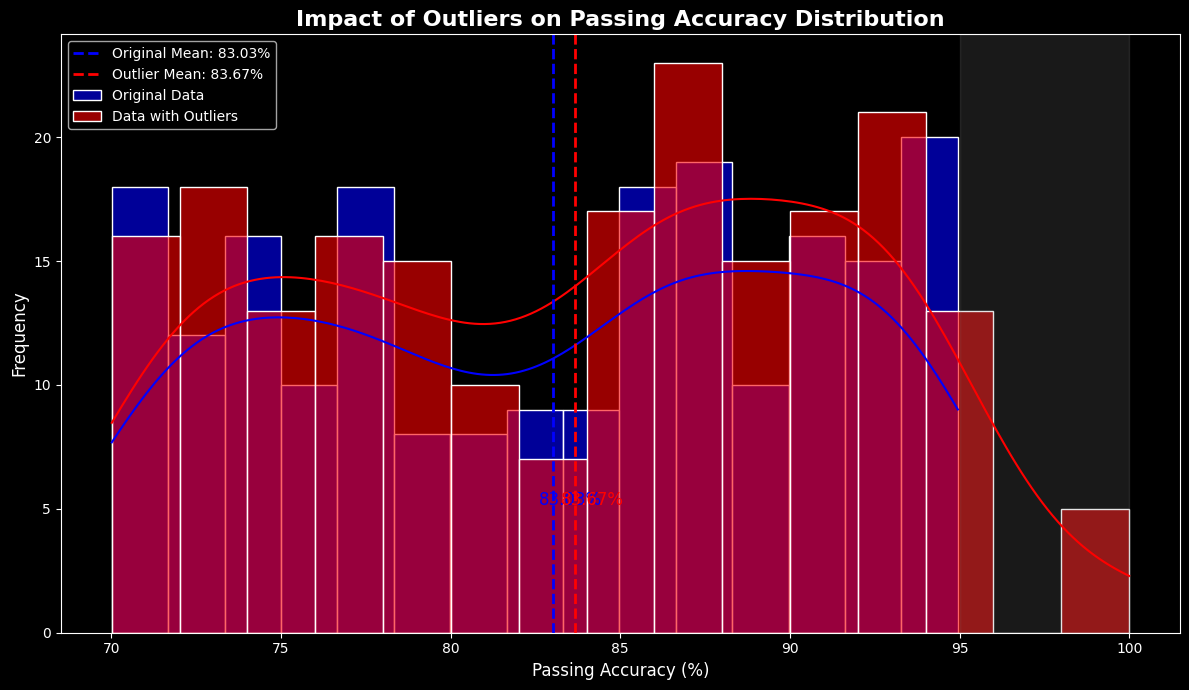

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate the impact of inaccurate data by introducing an outlier
df_with_outliers = df.copy()
df_with_outliers.loc[df_with_outliers.sample(5).index, 'Passing Accuracy (%)'] = 100  # Artificially high values

# Compare the mean passing accuracy before and after adding outliers
original_mean = df['Passing Accuracy (%)'].mean()
outlier_mean = df_with_outliers['Passing Accuracy (%)'].mean()

print(f"Original Mean Passing Accuracy: {original_mean}")
print(f"Mean Passing Accuracy with Outliers: {outlier_mean}")

# Set up the figure
plt.figure(figsize=(12, 7))


sns.histplot(df['Passing Accuracy (%)'], bins=15, kde=True, color='blue', label='Original Data', alpha=0.6)

# Plot the histogram for data with outliers
sns.histplot(df_with_outliers['Passing Accuracy (%)'], bins=15, kde=True, color='red', label='Data with Outliers', alpha=0.6)

plt.axvline(original_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Original Mean: {original_mean:.2f}%')
plt.axvline(outlier_mean, color='red', linestyle='dashed', linewidth=2, label=f'Outlier Mean: {outlier_mean:.2f}%')

plt.text(original_mean + 0.5, 5, f'{original_mean:.2f}%', color='blue', fontsize=12, ha='center', va='bottom')
plt.text(outlier_mean + 0.5, 5, f'{outlier_mean:.2f}%', color='red', fontsize=12, ha='center', va='bottom')

plt.title('Impact of Outliers on Passing Accuracy Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Passing Accuracy (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper left')

plt.axvspan(95, 100, color='gray', alpha=0.2, label='Outlier Region')

plt.tight_layout()
plt.show()


In [12]:
forwards = df[df['Position'] == 'Forward'].groupby('Player Name')['Passing Accuracy (%)'].mean().reset_index().sort_values(by='Passing Accuracy (%)', ascending=False).reset_index(drop=True)
midfielders = df[df['Position'] == 'Midfielder'].groupby('Player Name')['Passing Accuracy (%)'].mean().reset_index().sort_values(by='Passing Accuracy (%)', ascending=False).reset_index(drop=True)
defenders = df[df['Position'] == 'Defender'].groupby('Player Name')['Passing Accuracy (%)'].mean().reset_index().sort_values(by='Passing Accuracy (%)', ascending=False).reset_index(drop=True)
goalkeepers = df[df['Position'] == 'Goalkeeper'].groupby('Player Name')['Passing Accuracy (%)'].mean().reset_index().sort_values(by='Passing Accuracy (%)', ascending=False).reset_index(drop=True)

# Display the sorted tables for each position without index numbers
print("Forwards sorted by Average Passing Accuracy:")
print(forwards.to_string(index=False))
print("\nMidfielders sorted by Average Passing Accuracy:")
print(midfielders.to_string(index=False))
print("\nDefenders sorted by Average Passing Accuracy:")
print(defenders.to_string(index=False))
print("\nGoalkeepers sorted by Average Passing Accuracy:")
print(goalkeepers.to_string(index=False))


Forwards sorted by Average Passing Accuracy:
          Player Name  Passing Accuracy (%)
         Deandre Kerr             85.903333
Federico Bernardeschi             85.817500
       Adama Diomande             82.956250
          C.J. Sapong             82.200000
      Lorenzo Insigne             81.926667
          Ayo Akinola             80.730000

Midfielders sorted by Average Passing Accuracy:
           Player Name  Passing Accuracy (%)
       Michael Bradley             86.667273
      Brandon Servania             86.101667
       Jonathan Osorio             85.472857
Alonso Coello Camarero             84.712727
     Mark-Anthony Kaye             80.778667
        Victor Vazquez             77.220000

Defenders sorted by Average Passing Accuracy:
   Player Name  Passing Accuracy (%)
 Richie Laryea             85.998000
 Kosi Thompson             83.820000
 Shane O'Neill             82.338667
 Sigurd Rosted             82.323636
 Kobe Franklin             81.276667
Raoul Petretta

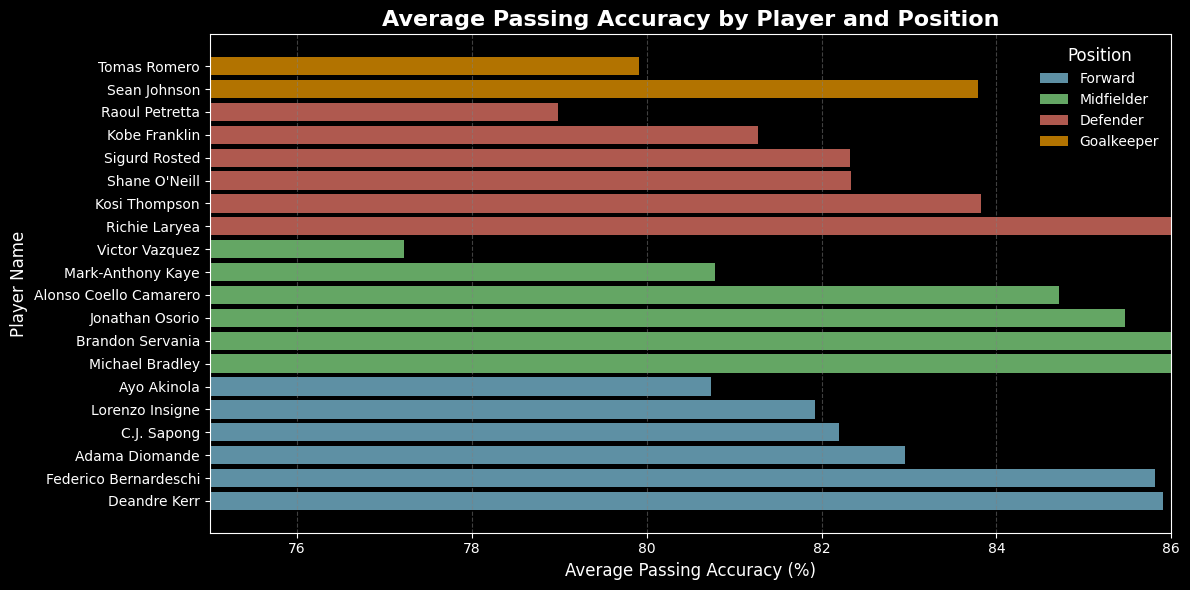

In [37]:
import matplotlib.pyplot as plt

# Define positions to analyze
positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']

# Create a dictionary to store dataframes for each position
position_data = {}

for position in positions:
    position_data[position] = (
        df[df['Position'] == position]
        .groupby('Player Name')['Passing Accuracy (%)']
        .mean()
        .reset_index()
        .sort_values(by='Passing Accuracy (%)', ascending=False)
    )

# Set up the figure for the grouped bar chart with a dark background
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')

# Define colors for each position
colors = {
    'Forward': 'skyblue',
    'Midfielder': 'lightgreen',
    'Defender': 'salmon',
    'Goalkeeper': 'orange'
}

# Plot each position on the same horizontal bar chart
for position in positions:
    plt.barh(
        position_data[position]['Player Name'],
        position_data[position]['Passing Accuracy (%)'],
        label=position,
        color=colors[position],
        alpha=0.7
    )

# Add labels, title, and legend with colors suitable for the dark background
plt.title('Average Passing Accuracy by Player and Position', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Average Passing Accuracy (%)', fontsize=12, color='white')
plt.ylabel('Player Name', fontsize=12, color='white')

# Adjust the x-axis limits for better visualization
plt.xlim(75, 86)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5, color='gray')

# Adjust layout for better spacing and ensure labels are clear
plt.tight_layout()

# Add the legend with a title
plt.legend(title='Position', fontsize=10, title_fontsize=12, frameon=False, loc='upper right')

# Show the plot
plt.show()


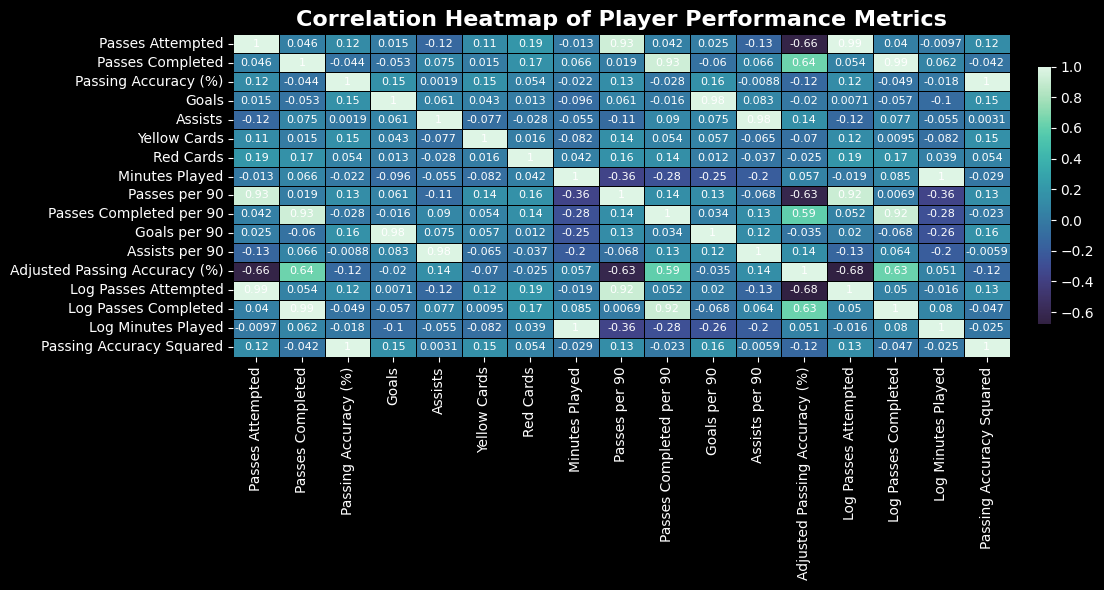

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame with all the relevant data

# Step 1: Select only numerical columns for correlation
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Step 3: Set up a dark background for the plot
plt.style.use('dark_background')

# Step 4: Create the heatmap with a smoother color palette
plt.figure(figsize=(12, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='mako',  # Choose a palette with smoother transitions suitable for dark backgrounds
    center=0,
    linewidths=0.4,
    linecolor='black',  # Add lines between cells for better separation
    annot_kws={'size': 8, 'color': 'white'},  # Smaller annotations for a cleaner look
    cbar_kws={'shrink': 0.8, 'orientation': 'vertical', 'pad': 0.03}  # Adjust color bar size and position
)
plt.title('Correlation Heatmap of Player Performance Metrics', fontsize=16, fontweight='bold', color='white')
plt.tight_layout()

# Display the plot
plt.show()


In [22]:
import pandas as pd
import numpy as np

df['Passes per 90'] = (df['Passes Attempted'] / df['Minutes Played']) * 90
df['Passes Completed per 90'] = (df['Passes Completed'] / df['Minutes Played']) * 90

# Calculate Goals per 90 minutes
df['Goals per 90'] = (df['Goals'] / df['Minutes Played']) * 90

# Calculate Assists per 90 minutes
df['Assists per 90'] = (df['Assists'] / df['Minutes Played']) * 90

# Recalculate Passing Accuracy using these new metrics for consistency
df['Adjusted Passing Accuracy (%)'] = (df['Passes Completed'] / df['Passes Attempted']) * 100
df.head()


,Player Name,Match Date,Passes Attempted,Passes Completed,Passing Accuracy (%),Goals,Assists,Yellow Cards,Red Cards,Minutes Played,Position,Passes per 90,Passes Completed per 90,Goals per 90,Assists per 90,Adjusted Passing Accuracy (%)
0,Shane O'Neill,2023-01-01,98,50,84.44,0.0,0,0.0,1,60,Defender,147.000000,75.000000,0.000000,0.000000,51.020408
16,Mark-Anthony Kaye,2023-01-08,76,27,70.74,0.0,0,0.0,0,66,Midfielder,103.636364,36.818182,0.000000,0.000000,35.526316
31,Sigurd Rosted,2023-01-15,45,40,88.28,2.0,1,1.0,1,90,Defender,45.000000,40.000000,2.000000,1.000000,88.888889
42,Sean Johnson,2023-01-22,60,92,94.54,2.0,1,0.0,1,67,Goalkeeper,80.597015,123.582090,2.686567,1.343284,153.333333
57,Victor Vazquez,2023-01-29,74,79,71.14,2.0,0,0.0,0,68,Midfielder,97.941176,104.558824,2.647059,0.000000,106.756757


In [23]:
df['Log Passes Attempted'] = np.log1p(df['Passes Attempted'])
df['Log Passes Completed'] = np.log1p(df['Passes Completed'])
df['Log Minutes Played'] = np.log1p(df['Minutes Played'])

df['Passing Accuracy Squared'] = df['Passing Accuracy (%)'] ** 2
df.head()


,Player Name,Match Date,Passes Attempted,Passes Completed,Passing Accuracy (%),Goals,Assists,Yellow Cards,Red Cards,Minutes Played,Position,Passes per 90,Passes Completed per 90,Goals per 90,Assists per 90,Adjusted Passing Accuracy (%),Log Passes Attempted,Log Passes Completed,Log Minutes Played,Passing Accuracy Squared
0,Shane O'Neill,2023-01-01,98,50,84.44,0.0,0,0.0,1,60,Defender,147.000000,75.000000,0.000000,0.000000,51.020408,4.595120,3.931826,4.110874,7130.1136
16,Mark-Anthony Kaye,2023-01-08,76,27,70.74,0.0,0,0.0,0,66,Midfielder,103.636364,36.818182,0.000000,0.000000,35.526316,4.343805,3.332205,4.204693,5004.1476
31,Sigurd Rosted,2023-01-15,45,40,88.28,2.0,1,1.0,1,90,Defender,45.000000,40.000000,2.000000,1.000000,88.888889,3.828641,3.713572,4.510860,7793.3584
42,Sean Johnson,2023-01-22,60,92,94.54,2.0,1,0.0,1,67,Goalkeeper,80.597015,123.582090,2.686567,1.343284,153.333333,4.110874,4.532599,4.219508,8937.8116
57,Victor Vazquez,2023-01-29,74,79,71.14,2.0,0,0.0,0,68,Midfielder,97.941176,104.558824,2.647059,0.000000,106.756757,4.317488,4.382027,4.234107,5060.8996


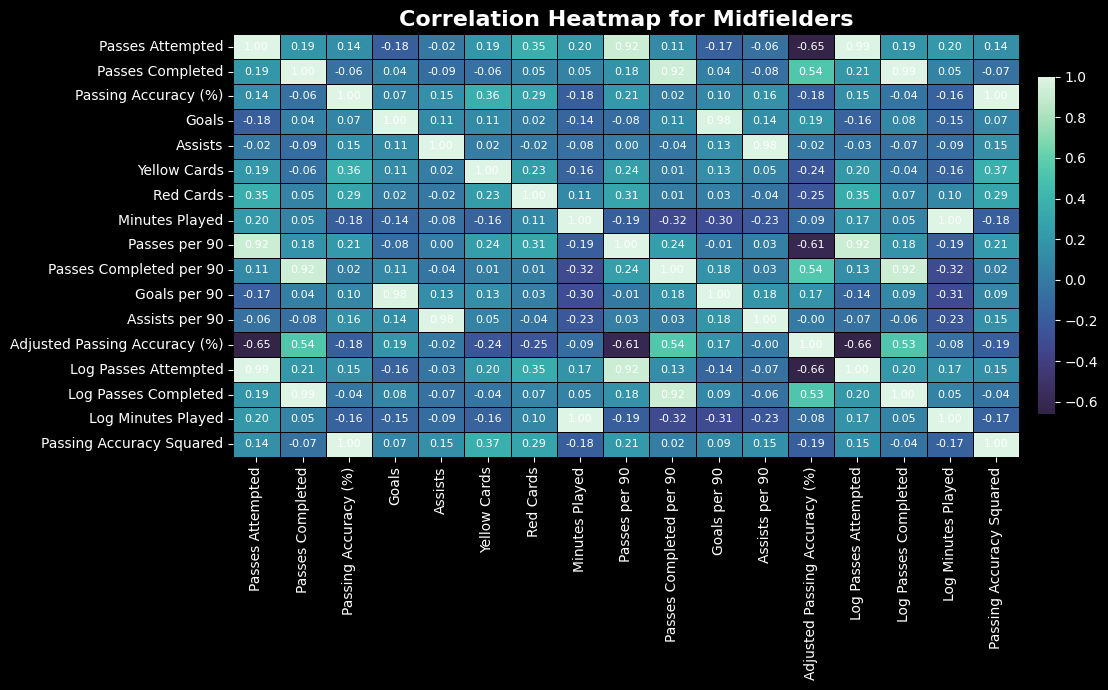

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame with all relevant data
# Filter data to focus on midfielders
midfielders = df[df['Position'] == 'Midfielder']
numeric_cols = midfielders.select_dtypes(include=[np.number])

# Calculate correlation matrix for midfielders
correlation_matrix_midfielders = numeric_cols.corr()

# Set up a dark background for the plot
plt.style.use('dark_background')

# Create the heatmap with a suitable color palette
plt.figure(figsize=(12, 7))
sns.heatmap(
    correlation_matrix_midfielders,
    annot=True,
    fmt=".2f",
    cmap='mako',  # A smooth gradient palette suitable for dark backgrounds
    center=0,
    linewidths=0.5,
    linecolor='black',  # Adds thin borders for cell separation
    annot_kws={'size': 8, 'color': 'white'},  # White annotations for contrast
    cbar_kws={'shrink': 0.8, 'orientation': 'vertical', 'pad': 0.02}  # Adjusts color bar for better fit
)

# Add title with improved styling
plt.title('Correlation Heatmap for Midfielders', fontsize=16, fontweight='bold', color='white')
plt.tight_layout()

# Display the plot
plt.show()


R² Score: 0.9956
Mean Squared Error (MSE): 0.2837


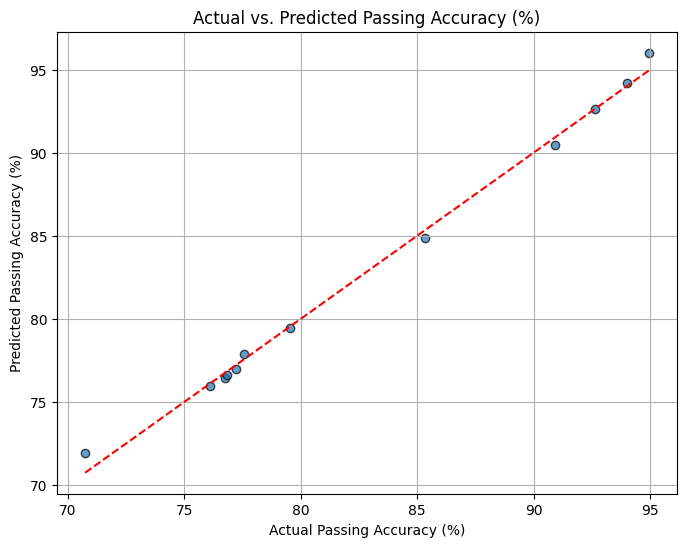

In [27]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only for features
numeric_cols = midfielders.select_dtypes(include=[np.number])

#  Define the features (X) and target (y)
X = numeric_cols.drop(columns=['Passing Accuracy (%)'])
y = numeric_cols['Passing Accuracy (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Passing Accuracy (%)')
plt.ylabel('Predicted Passing Accuracy (%)')
plt.title('Actual vs. Predicted Passing Accuracy (%)')
plt.grid(True)
plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")




Mean Absolute Error (MAE): 0.3987
Root Mean Squared Error (RMSE): 0.5326
R² Score: 0.9956
